<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ChilwaBasin_DataAnalysis_032024/ChilwaBasin_Regression_PyCaret_Cholera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last updated: 25 Mar 2024

# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [3]:
!pip install pycaret -q #[full] -q

In [2]:
!pip install pycaret[analysis]-q
!pip install pycaret[models]-q
!pip install pycaret[tuner]-q
!pip install pycaret[mlops]-q
!pip install pycaret[parallel]-q
!pip install pycaret[test]-q

ERROR: Invalid requirement: 'pycaret[analysis]-q'
ERROR: Invalid requirement: 'pycaret[models]-q'
ERROR: Invalid requirement: 'pycaret[tuner]-q'
ERROR: Invalid requirement: 'pycaret[mlops]-q'
ERROR: Invalid requirement: 'pycaret[parallel]-q'
ERROR: Invalid requirement: 'pycaret[test]-q'


In [7]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.0'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [9]:
### load sample dataset from pycaret dataset module
# from pycaret.datasets import get_data
# data = get_data('insurance')

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/mtofighi/ChilwaBasin/blob/main/ChilwaBasin_DataAnalysis_032024/Dataset/ChilwaBasin_Dataset_03012024.xlsx?raw=true'

dataAll = pd.read_excel(url)

# Convert the index to datetime format (assuming the index is in a date format)
dataAll.index = pd.to_datetime(dataAll.iloc[:, 0])

# Extract year and month from the index
dataAll['Year'] = dataAll.index.year
dataAll['Month'] = dataAll.index.month

# Set the columns 'Year' and 'Month' as the index
dataAll.set_index(['Year', 'Month'], inplace=True)

# # Check the type of dataset
# print("Data types:", data.dtypes)

# # Check the shape of the data
# print("Data shape:", data.shape)

# Convert the column names to an array
headers = dataAll.columns.to_numpy()

# Print the headers array
print("Headers:", headers)

Headers: ['Date' 'SatelliteAverageMinTemperature'
 'SatelliteAverageMinTemperatureStandardizedAnomaly'
 'SatelliteAverageMaxTemperature' 'AverageMeanTemperature'
 'AverageMeanTemperatureAnomaly'
 'AverageMeanTemperatureStandardizedAnomaly' 'ChancoMeanTemperature'
 'ChingaleMeanTemperature' 'MakokaMeanTemperature'
 'NaminjiwaMeanTemperature' 'NtajaMeanTemperature'
 'ZombaRTCMeanTemperature' 'AverageMinTemperature'
 'AverageMinTemperatureAnomaly' 'AverageMinTemperatureStandardizedAnomaly'
 'ChancoMinTemperature' 'ChingaleMinTemperature' 'MakokaMinTemperature'
 'NaminjiwaMinTemperature' 'NtajaMinTemperature' 'ZombaRTCMinTemperature'
 'AverageMaxTemperature' 'AverageMaxTemperatureAnomaly'
 'AverageMaxTemperatureStandardizedAnomaly' 'ChancoMaxTemperature'
 'ChingaleMaxTemperature' 'MakokaMaxTemperature' 'NaminjiwaMaxTemperature'
 'NtajaMaxTemperature' 'ZombaRTCMaxTemperature' 'SatelliteAverageRainfall'
 'SatelliteAverageRainfallStandardizedAnomaly' 'AverageRainfall'
 'RainfallAnomaly' 'Stan

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [14]:
# Cholera

# import pycaret regression and init setup
from pycaret.regression import *
##---------------------------------------------
# The dataset is called 'dataAll'
column_names = [
    'Date', 'SatelliteAverageMinTemperature', 'SatelliteAverageMinTemperatureStandardizedAnomaly', 'ActualEvapotransp',
    'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
    'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'Waterloggingkm2',
    'SatelliteAverageRainfall','SatelliteAverageRainfallStandardizedAnomaly',
    'AverageMinTemperature','AverageMinTemperatureStandardizedAnomaly',
    'AverageRainfall','StandardizedRainfallAnomaly',
    'PalmerDroughtSeverityIndex',
    'CholeraCasesD1' ,'CholeraCasesD2' ,'CholeraCasesD3', 'CholeraCasesD4',
    'CholeraCasesTotal',
    'SchistosomiasisCasesD1', 'SchistosomiasisCasesD2', 'SchistosomiasisCasesD3', 'SchistosomiasisCasesD4',
    'SchistosomiasisCasesTotal',
    'MalariaCasesD1', 'MalariaCasesD2', 'MalariaCasesD3', 'MalariaCasesD4',
    'MalariaCasesTotal',
    'MosquitoNetsD1' ,'MosquitoNetsD2','MosquitoNetsD3','MosquitoNetsD4',
    'MosquitoNetsTotal',
    'Malnutrition_LT5_NewCases_AllDistricts'
]  # Specify the desired column names

#start_date = '2013-01-01'  # Specify the start date
start_date = '2012-01-01'  # Specify the start date
end_date = '2021-12-01'  # Specify the end date
# end_date = '2018-12-01'  # Specify the end date

# Filter the data based on the column names and date range
sub_dataset = dataAll.loc[
    (dataAll['Date'] >= start_date) & (dataAll['Date'] <= end_date), column_names
]

# # Drop rows with missing values
# sub_dataset.dropna(inplace=True)

# Extract the features ,'MosquitoNetsCasesTotal'
data = sub_dataset[
    [
        'SatelliteAverageRainfall', 'ActualEvapotransp',
        'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
        'SatelliteAverageMinTemperature', 'PalmerDroughtSeverityIndex',
        'CholeraCasesTotal'
    ]
]

s = setup(data, target= 'CholeraCasesTotal', session_id = 123)

,Description,Value
0,Session id,123
1,Target,CholeraCasesTotal
2,Target type,Regression
3,Original data shape,"(120, 10)"
4,Transformed data shape,"(120, 10)"
5,Transformed train set shape,"(84, 10)"
6,Transformed test set shape,"(36, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [99]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,14.6941,1870.7412,31.1057,0.1454,1.2813,nan,0.1020
xgboost,Extreme Gradient Boosting,28.9708,3799.2928,55.0658,0.0426,2.0216,nan,0.0690
gbr,Gradient Boosting Regressor,23.7097,2866.5424,44.4278,0.0309,2.1411,nan,0.0980
rf,Random Forest Regressor,26.6978,2716.4133,43.8672,-0.0529,2.2765,nan,0.2010
par,Passive Aggressive Regressor,15.3077,2663.1125,30.6116,-0.1094,1.3397,nan,0.0360
en,Elastic Net,25.5322,2550.5260,36.3276,-0.1940,2.6406,nan,0.0310
dummy,Dummy Regressor,26.0716,2631.1154,36.9769,-0.2108,2.6835,nan,0.0480
dt,Decision Tree Regressor,26.1000,4325.0722,56.8159,-0.2240,2.0252,nan,0.0340
llar,Lasso Least Angle Regression,26.4337,2386.5162,37.2156,-0.3015,2.6140,nan,0.0350
lasso,Lasso Regression,26.4335,2386.4869,37.2153,-0.3015,2.6140,nan,0.0340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

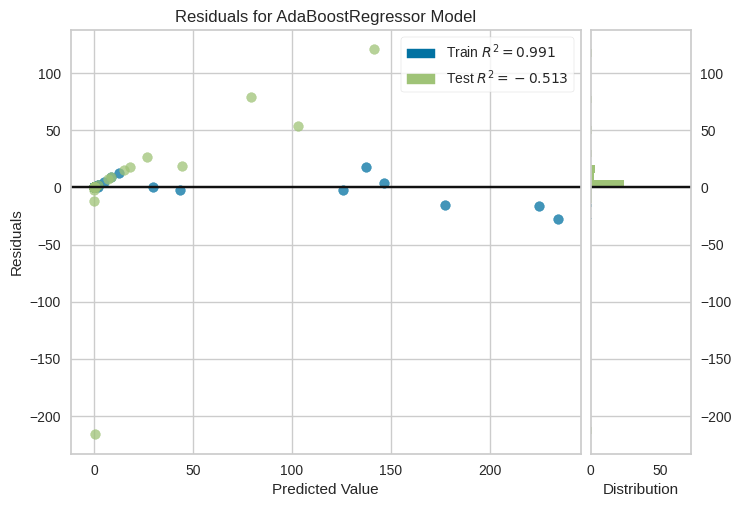

In [19]:
# plot residuals
plot_model(best, plot = 'residuals')

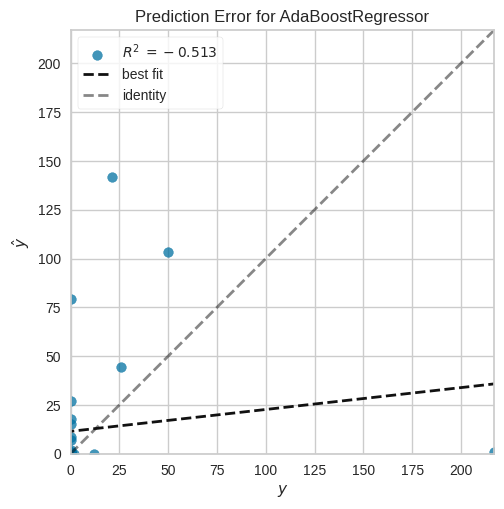

In [20]:
# plot error
plot_model(best, plot = 'error')

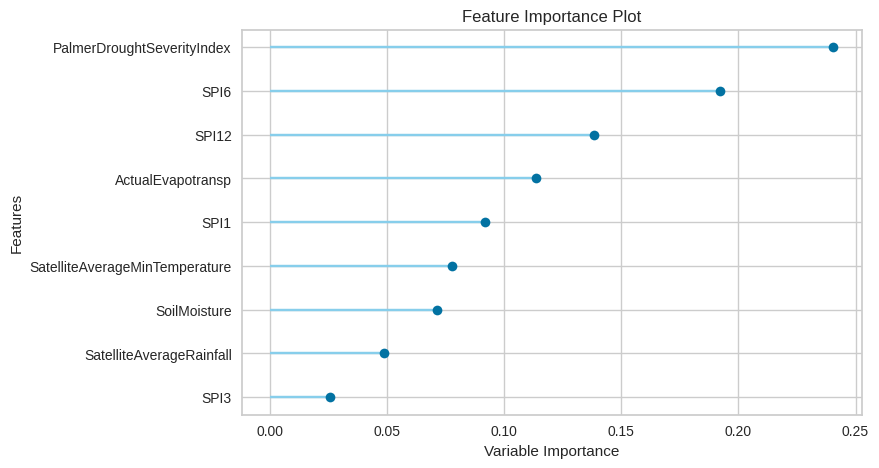

AttributeError: 'AdaBoostRegressor' object has no attribute 'get_feature_importance'

<Figure size 800x550 with 0 Axes>

In [21]:
# plot feature importance
# plot_model(best, plot = 'feature')
#-------------------------------
import matplotlib.pyplot as plt
# Plot and retrieve feature importance
plot_model(best, plot='feature')
plt.savefig('Cholera_feature_importance_plot.jpg', dpi=300, bbox_inches='tight')

# Retrieve the configuration
config = get_config('X_train')

# Access feature values
feature_values = config.columns

# Retrieve feature importance values
feature_importance_values = best.get_feature_importance()

# Create a DataFrame to store feature names, values, and importance
feature_df = pd.DataFrame({'Feature': feature_values, 'Importance': feature_importance_values})

# Print the merged DataFrame
print(feature_df)

# Save to an Excel file
feature_df.to_excel('Cholera_feature_values_importance.xlsx', index=False)

In [100]:
# # check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [102]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [101]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,16.1709,2011.4586,44.8493,-0.5128,1.6127,1.7532


In [27]:
# show predictions df
holdout_pred.head()

SatelliteAverageRainfall  ActualEvapotransp  SoilMoisture  SPI1  \
Year Month                                                                    
2012 5                           0.0          66.800003    137.800003 -0.23   
2021 10                          0.0          22.500000     43.299999 -0.59   
     5                          48.0          59.900002    138.800003  1.58   
2020 9                           0.0          15.100000     31.100000  0.59   
2014 8                           0.0          27.700001     57.400002  0.44   

            SPI3  SPI6  SPI12  SatelliteAverageMinTemperature  \
Year Month                                                      
2012 5     -0.87 -2.25  -1.87                       14.300000   
2021 10    -0.85  0.24  -0.33                       18.700001   
     5      0.72  0.16  -0.32                       14.200000   
2020 9     -0.27 -1.51  -0.06                       15.900000   
2014 8     -0.30 -1.06  -1.66                       13.400000   

            PalmerDroughtSeverityIndex  CholeraCasesTotal  prediction_label  
Year Month                                                                   
2012 5                            0.29                0.0               0.0  
2021 10                           0.87                0.0               0.0  
     5                           -2.78                0.0               0.0  
2020 9                           -4.27                0.0               0.0  
2014 8                           -2.86                0.0              18.0

from matplotlib import pyplot as plt
_df_0['SatelliteAverageRainfall'].plot(kind='hist', bins=20, title='SatelliteAverageRainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ActualEvapotransp'].plot(kind='hist', bins=20, title='ActualEvapotransp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['SoilMoisture'].plot(kind='hist', bins=20, title='SoilMoisture')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['SPI1'].plot(kind='hist', bins=20, title='SPI1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SatelliteAverageRainfall', y='ActualEvapotransp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='ActualEvapotransp', y='SoilMoisture', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='SoilMoisture', y='SPI1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='SPI1', y='SPI3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CholeraCasesTotal']
  ys = series['SatelliteAverageRainfall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('CholeraCasesTotal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CholeraCasesTotal')
_ = plt.ylabel('SatelliteAverageRainfall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CholeraCasesTotal']
  ys = series['ActualEvapotransp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('CholeraCasesTotal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CholeraCasesTotal')
_ = plt.ylabel('ActualEvapotransp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CholeraCasesTotal']
  ys = series['SoilMoisture']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('CholeraCasesTotal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CholeraCasesTotal')
_ = plt.ylabel('SoilMoisture')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CholeraCasesTotal']
  ys = series['SPI1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('CholeraCasesTotal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CholeraCasesTotal')
_ = plt.ylabel('SPI1')

from matplotlib import pyplot as plt
_df_12['SatelliteAverageRainfall'].plot(kind='line', figsize=(8, 4), title='SatelliteAverageRainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['ActualEvapotransp'].plot(kind='line', figsize=(8, 4), title='ActualEvapotransp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['SoilMoisture'].plot(kind='line', figsize=(8, 4), title='SoilMoisture')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['SPI1'].plot(kind='line', figsize=(8, 4), title='SPI1')
plt.gca().spines[['top', 'right']].set_visible(False)

___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [103]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['SatelliteAverageRainfall',
                                              'ActualEvapotransp',
                                              'SoilMoisture', 'SPI1', 'SPI3',
                                              'SPI6', 'SPI12',
                                              'SatelliteAverageMinTemperature',
                                              'PalmerDroughtSeverityIndex'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model', AdaBoostRegressor(random_state=123))]),
 'my_first_pipeline.pkl')

In [31]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['SatelliteAverageRainfall',
                                             'ActualEvapotransp',
                                             'SoilMoisture', 'SPI1', 'SPI3',
                                             'SPI6', 'SPI12',
                                             'SatelliteAverageMinTemperature',
                                             'PalmerDroughtSeverityIndex'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', AdaBoostRegressor(random_state=123))])

# 👇 Detailed function-by-function overview

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [38]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,14.6941,1870.7412,31.1057,0.1454,1.2813,nan,0.1050
xgboost,Extreme Gradient Boosting,28.9708,3799.2928,55.0658,0.0426,2.0216,nan,0.0710
gbr,Gradient Boosting Regressor,23.7097,2866.5424,44.4278,0.0309,2.1411,nan,0.0980
rf,Random Forest Regressor,26.6978,2716.4133,43.8672,-0.0529,2.2765,nan,0.2990
par,Passive Aggressive Regressor,15.3077,2663.1125,30.6116,-0.1094,1.3397,nan,0.0330
en,Elastic Net,25.5322,2550.5260,36.3276,-0.1940,2.6406,nan,0.0330
dummy,Dummy Regressor,26.0716,2631.1154,36.9769,-0.2108,2.6835,nan,0.0320
dt,Decision Tree Regressor,26.1000,4325.0722,56.8159,-0.2240,2.0252,nan,0.0320
llar,Lasso Least Angle Regression,26.4337,2386.5162,37.2156,-0.3015,2.6140,nan,0.0340
lasso,Lasso Regression,26.4335,2386.4869,37.2153,-0.3015,2.6140,nan,0.0330


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [39]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [41]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm'])#, 'catboost'

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,28.9708,3799.2928,55.0658,0.0426,2.0216,nan,0.0690
gbr,Gradient Boosting Regressor,23.7097,2866.5424,44.4278,0.0309,2.1411,nan,0.0950
rf,Random Forest Regressor,26.6978,2716.4133,43.8672,-0.0529,2.2765,nan,0.1710
dt,Decision Tree Regressor,26.1000,4325.0722,56.8159,-0.2240,2.0252,nan,0.0520
lightgbm,Light Gradient Boosting Machine,27.5288,2338.4295,38.5243,-0.3313,2.6649,nan,0.1210
et,Extra Trees Regressor,22.1459,2194.8102,35.6403,-0.8469,2.0913,nan,0.1300


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [42]:
compare_tree_models

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [43]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,28.9708,3799.2928,55.0658,0.0426,2.0216,NaN,0.069
gbr,Gradient Boosting Regressor,23.7097,2866.5424,44.4278,0.0309,2.1411,NaN,0.095
rf,Random Forest Regressor,26.6978,2716.4133,43.8672,-0.0529,2.2765,NaN,0.171
dt,Decision Tree Regressor,26.1000,4325.0722,56.8159,-0.2240,2.0252,NaN,0.052
lightgbm,Light Gradient Boosting Machine,27.5288,2338.4295,38.5243,-0.3313,2.6649,NaN,0.121
et,Extra Trees Regressor,22.1459,2194.8102,35.6403,-0.8469,2.0913,NaN,0.130


from matplotlib import pyplot as plt
compare_tree_models_results['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
compare_tree_models_results.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results.plot(kind='scatter', x='MAE', y='MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results.plot(kind='scatter', x='MSE', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results.plot(kind='scatter', x='RMSE', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results.plot(kind='scatter', x='R2', y='RMSLE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
compare_tree_models_results['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(compare_tree_models_results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(compare_tree_models_results, x='MAE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(compare_tree_models_results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(compare_tree_models_results, x='MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(compare_tree_models_results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(compare_tree_models_results, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(compare_tree_models_results['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(compare_tree_models_results, x='R2', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

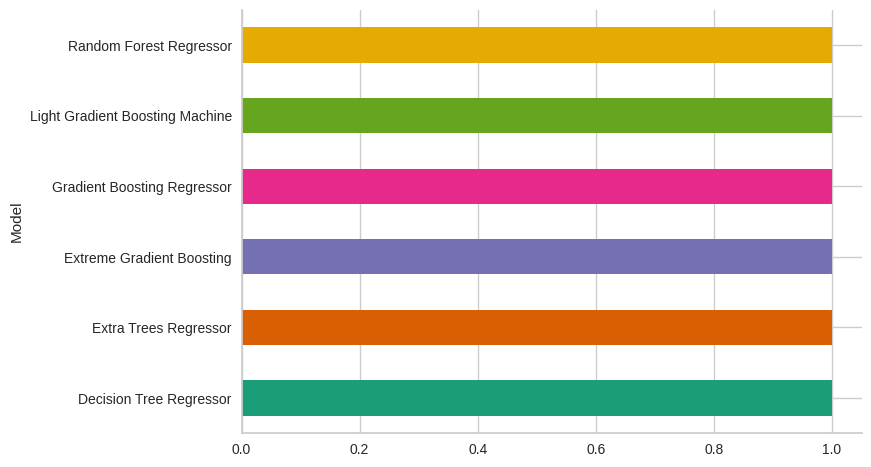

In [45]:
# @title Model

from matplotlib import pyplot as plt
import seaborn as sns
compare_tree_models_results.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [46]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,14.6941,1870.7412,31.1057,0.1454,1.2813,nan,0.1060
par,Passive Aggressive Regressor,15.3077,2663.1125,30.6116,-0.1094,1.3397,nan,0.0440
knn,K Neighbors Regressor,17.8592,2030.5006,33.0141,-0.5306,1.4420,nan,0.0400
et,Extra Trees Regressor,22.1459,2194.8102,35.6403,-0.8469,2.0913,nan,0.1280
gbr,Gradient Boosting Regressor,23.7097,2866.5424,44.4278,0.0309,2.1411,nan,0.0940
en,Elastic Net,25.5322,2550.5260,36.3276,-0.1940,2.6406,nan,0.0300
dummy,Dummy Regressor,26.0716,2631.1154,36.9769,-0.2108,2.6835,nan,0.0760
dt,Decision Tree Regressor,26.1000,4325.0722,56.8159,-0.2240,2.0252,nan,0.0330
br,Bayesian Ridge,26.2661,2243.6775,36.7341,-0.4265,2.6074,nan,0.0390
lasso,Lasso Regression,26.4335,2386.4869,37.2153,-0.3015,2.6140,nan,0.0340


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [47]:
# list of top 3 models by MAE
best_mae_models_top3

[AdaBoostRegressor(random_state=123),
 PassiveAggressiveRegressor(random_state=123),
 KNeighborsRegressor(n_jobs=-1)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [48]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.1648,655.8265,25.6091,0.0000,2.8601,nan
1,24.2033,939.6628,30.6539,0.3393,2.7357,0.5117
2,18.1724,573.7516,23.9531,0.0000,2.7265,nan
3,25.7232,906.1171,30.1018,-9.1938,3.0060,0.6139
4,21.7601,497.6831,22.3088,0.0000,3.1089,nan
5,82.3883,14116.9912,118.8149,-0.1887,2.6196,0.8574
6,31.0616,2016.5225,44.9057,0.4994,2.6053,0.4871
7,23.1882,784.1526,28.0027,0.0000,3.0473,nan
8,37.0415,1844.0070,42.9419,-0.0334,3.0905,3.1302


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [49]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.1648,655.8265,25.6091,0.0000,2.8601,NaN
1,24.2033,939.6628,30.6539,0.3393,2.7357,0.5117
2,18.1724,573.7516,23.9531,0.0000,2.7265,NaN
3,25.7232,906.1171,30.1018,-9.1938,3.0060,0.6139
4,21.7601,497.6831,22.3088,0.0000,3.1089,NaN
5,82.3883,14116.9912,118.8149,-0.1887,2.6196,0.8574
6,31.0616,2016.5225,44.9057,0.4994,2.6053,0.4871
7,23.1882,784.1526,28.0027,0.0000,3.0473,NaN
8,37.0415,1844.0070,42.9419,-0.0334,3.0905,3.1302


In [50]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.2359,1061.1550,32.5754,-1.1398,2.9663,0.4412
1,35.0211,4170.7886,64.5816,0.1136,2.6138,0.7917
2,28.7981,1352.8627,36.7813,0.2556,2.8973,2.4043
Mean,29.6850,2194.9354,44.6461,-0.2568,2.8258,1.2124
Std,4.0437,1402.2054,14.2007,0.6270,0.1525,0.8549


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.5115,498.5070,22.3273,0.0000,2.5313,nan
1,19.9677,842.0779,29.0186,0.4079,2.3438,0.5882
2,14.6866,379.9363,19.4920,0.0000,2.5787,nan
3,19.7746,618.1893,24.8634,-5.9546,2.7299,0.4118
4,20.1663,607.0912,24.6392,0.0000,2.9151,nan
5,83.5050,14573.5166,120.7208,-0.2271,2.6290,0.8717
6,29.2852,2164.6731,46.5260,0.4626,2.4039,0.5335
7,23.6142,925.3053,30.4188,0.0000,2.9724,nan
8,32.2925,1270.4094,35.6428,0.2881,2.9976,4.7778


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [52]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [104]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.7778,6453.4444,80.3333,0.0000,1.8296,nan
1,13.3333,1600.0000,40.0000,-0.1250,1.5986,1.0000
2,15.5556,705.7778,26.5665,0.0000,2.2528,nan
3,3.3333,100.0000,10.0000,-0.1250,1.1447,1.0000
4,9.5000,377.0000,19.4165,0.0000,1.8240,nan
5,80.7500,14108.7500,118.7803,-0.1880,3.1415,0.8372
6,29.8750,4920.6250,70.1472,-0.2216,2.3069,1.0000
7,15.0000,1800.0000,42.4264,0.0000,1.6956,nan
8,34.1250,4604.6250,67.8574,-1.5804,2.4881,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [105]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,nan
1,13.3333,1600.0000,40.0000,-0.1250,1.5986,1.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,nan
3,3.3333,100.0000,10.0000,-0.1250,1.1447,1.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,nan
5,80.7500,18396.7500,135.6346,-0.5490,3.2764,1.0000
6,29.8750,4920.6250,70.1472,-0.2216,2.3069,1.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,nan
8,16.2500,2048.5000,45.2604,-0.1480,1.7616,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [106]:
dt

DecisionTreeRegressor(random_state=123)

In [107]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9394,105.1307,10.2533,0.0000,1.2330,nan
1,10.3603,959.7860,30.9804,0.3252,0.4884,0.7745
2,17.6856,679.3303,26.0640,0.0000,2.4831,nan
3,6.7707,204.5729,14.3029,-1.3014,1.6160,0.9988
4,11.5231,352.6675,18.7794,0.0000,2.1161,nan
5,80.9214,14258.5866,119.4093,-0.2006,2.9923,0.7933
6,27.9509,2851.0972,53.3957,0.2922,1.8424,0.5237
7,23.9914,4592.0151,67.7644,0.0000,1.8604,nan
8,19.8438,2151.8203,46.3877,-0.2059,2.1312,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [120]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0000,nan
1,13.3333,1600.0000,40.0000,-0.1250,1.5986,1.0000
2,0.0000,0.0000,0.0000,1.0000,0.0000,nan
3,3.3333,100.0000,10.0000,-0.1250,1.1447,1.0000
4,0.0000,0.0000,0.0000,1.0000,0.0000,nan
5,80.7500,18396.7500,135.6346,-0.5490,3.2764,1.0000
6,29.8750,4920.6250,70.1472,-0.2216,2.3069,1.0000
7,0.0000,0.0000,0.0000,1.0000,0.0000,nan
8,16.2500,2048.5000,45.2604,-0.1480,1.7616,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [58]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      max_features='log2', min_impurity_decrease=0.0002,
                      min_samples_leaf=5, min_samples_split=5,
                      random_state=123)

In [59]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['SatelliteAverageRainfall',
                                                                          'ActualEvapotransp',
                                                                          'SoilMoisture',
                                                                          'SPI1',
                                                                          'SPI3',
                                                                          'SPI6',
                                                                          'SPI12',
                                                                          'SatelliteAverageMinTemperature',
                                                                          'PalmerDroughtSeverityIndex'],
                                                                 transformer=SimpleI...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=Fal

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

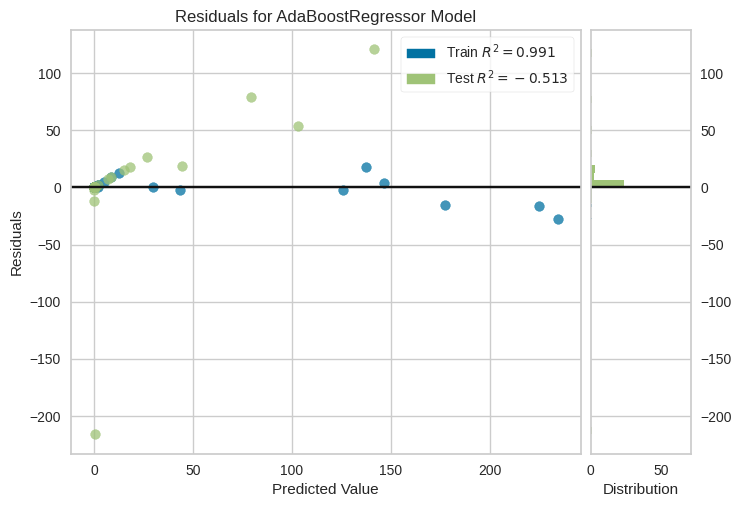

In [112]:
# plot residuals
plot_model(best, plot = 'residuals') #---------------------

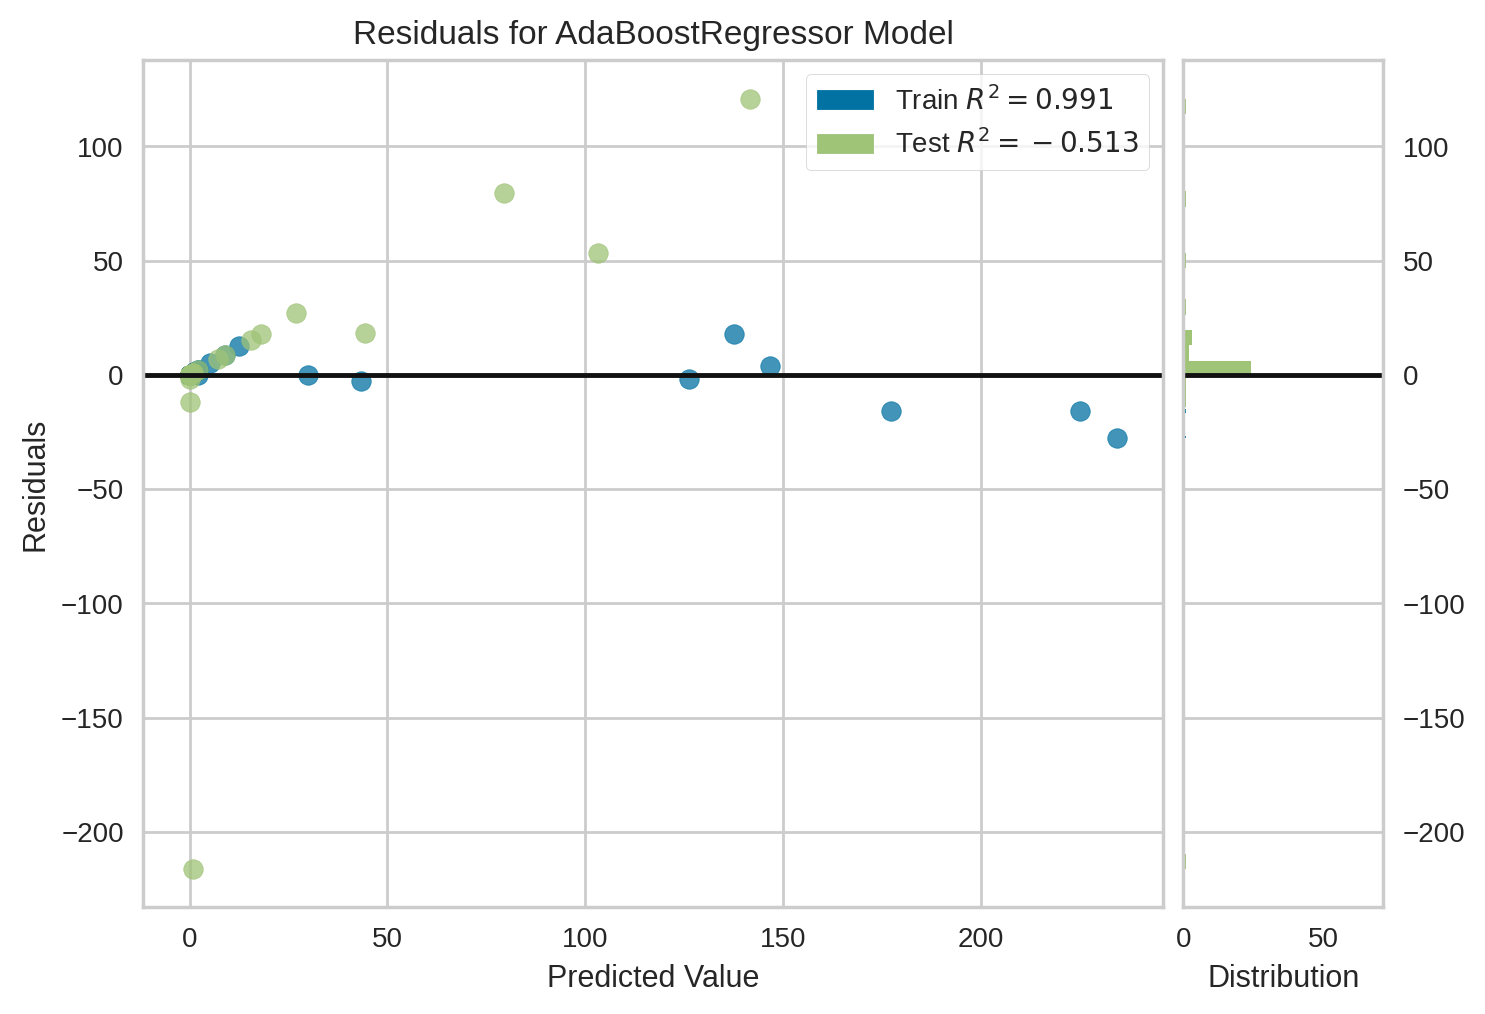

In [113]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2) #--------------------------

In [114]:
# to save the plot
plot_model(best, plot = 'residuals', save=True) #--------------------------

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model) #--------------------------

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [108]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,29.5695,1600.0597,40.0007,0.0000,3.1830,nan
1,18.2206,752.6257,27.4340,0.4708,2.2432,0.5383
2,23.1593,756.9856,27.5134,0.0000,3.0487,nan
3,16.4130,462.7067,21.5106,-4.2055,2.6398,0.0071
4,26.0150,749.9836,27.3858,0.0000,3.2615,nan
5,79.8845,15002.1369,122.4832,-0.2632,2.6537,0.8729
6,24.9102,1821.9241,42.6840,0.5477,1.9612,0.5693
7,13.1075,252.1596,15.8795,0.0000,2.4975,nan
8,27.3695,1540.2798,39.2464,0.1368,2.4700,4.3706


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [118]:
# # interpret summary model
# interpret_model(lightgbm, plot = 'summary')

In [122]:
# # reason plot for test set observation 1 --------------------------
# interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [80]:
# help(interpret_model) #--------

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [81]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/62 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,(TransformerWrapper(include=['SatelliteAverage...,30.6683,2314.6424,39.5783,-0.8577,2.8762,NaN
1,Lasso Regression,(TransformerWrapper(include=['SatelliteAverage...,26.4335,2386.4869,37.2153,-0.3015,2.6140,NaN
2,Ridge Regression,(TransformerWrapper(include=['SatelliteAverage...,26.7114,2221.2104,36.7366,-0.4572,2.6433,NaN
3,Elastic Net,(TransformerWrapper(include=['SatelliteAverage...,25.5322,2550.5260,36.3276,-0.1940,2.6406,NaN
4,Least Angle Regression,(TransformerWrapper(include=['SatelliteAverage...,30.6683,2314.6423,39.5783,-0.8577,2.8762,NaN
5,Lasso Least Angle Regression,(TransformerWrapper(include=['SatelliteAverage...,26.4337,2386.5162,37.2156,-0.3015,2.6140,NaN
6,Orthogonal Matching Pursuit,(TransformerWrapper(include=['SatelliteAverage...,29.3112,2747.8377,40.6161,-0.4686,2.7845,NaN
7,Bayesian Ridge,(TransformerWrapper(include=['SatelliteAverage...,26.2661,2243.6775,36.7341,-0.4265,2.6074,NaN
8,Passive Aggressive Regressor,(TransformerWrapper(include=['SatelliteAverage...,15.3077,2663.1125,30.6116,-0.1094,1.3397,NaN


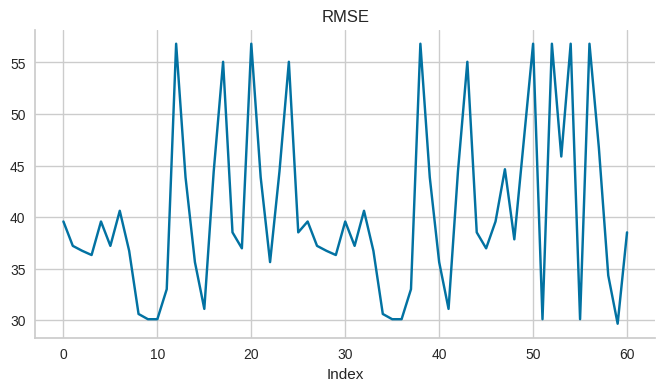

In [123]:
# @title RMSE

from matplotlib import pyplot as plt
lb['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

In [82]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['SatelliteAverageRainfall',
                                             'ActualEvapotransp',
                                             'SoilMoisture', 'SPI1', 'SPI3',
                                             'SPI6', 'SPI12',
                                             'SatelliteAverageMinTemperature',
                                             'PalmerDroughtSeverityIndex'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ['trained_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                                       max_features='log2',
                                       min_impurity_decrease=0.0002,
                                       min_samples_leaf=5, min_samples_split=5,
                                       random_state=123)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [83]:
# find best model based on CV metrics
automl()

LinearRegression(n_jobs=-1)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [125]:
# # dashboard function #----------------------------
# dashboard(dt, display_format ='inline')

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['SatelliteAverageRainfall',
                                             'ActualEvapotransp',
                                             'SoilMoisture', 'SPI1', 'SPI3',
                                             'SPI6', 'SPI12', 'SPI24', 'SPI36',
                                             'SPI48', 'SPI60', 'SPI72',
                                             'Waterloggingkm2',
                                             'SatelliteAverageMinTemperature',
                                             'PalmerDroughtSeverityIndex',
                                             'MosquitoNetsCasesTotal'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7db140e34190>)])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [4]:
! pip install m2cgen -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 2.2 MB/s eta 0:00:00


In [9]:
import m2cgen as m2c
code = m2c.export_to_java(dt)

NameError: name 'dt' is not defined

In [6]:
! pip install m2cgen -q
from m2cgen import convert_model

print(convert_model(dt, language = 'java'))

ImportError: cannot import name 'convert_model' from 'm2cgen' (/usr/local/lib/python3.10/dist-packages/m2cgen/__init__.py)

In [7]:
!pip show m2cgen

Name: m2cgen
Version: 0.10.0
Summary: Code-generation for various ML models into native code.
Home-page: https://github.com/BayesWitnesses/m2cgen
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: 


In [8]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

NameError: name 'convert_model' is not defined

## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerW...
                                                                                      'female': 0,
                                                                                      'male': 1}},
                                                                         {'col': 'smoker',
                                                                          'mapping': {nan: -1,
                                                                             

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                                                                                     'female': 0,
                                                                                     'male': 1}},
                                                                        {'col': 'smoker',
                                                                         'mapping': {nan: -1,
                                                                                     'no': 0,
                                                                                     'yes': 1}}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


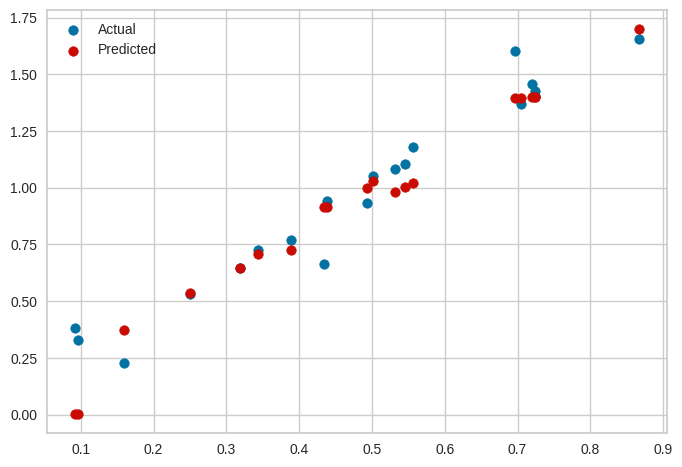

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split

# # Generate some random data for demonstration
# X = np.random.rand(100, 1)
# y = 2 * X.squeeze() + np.random.normal(scale=0.1, size=100)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the CatBoostRegressor model
# model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE')
# model.fit(X_train, y_train, verbose=False)

# # Make predictions
# y_pred = model.predict(X_test)

# # Visualize the results
# plt.scatter(X_test, y_test, color='b', label='Actual')
# plt.scatter(X_test, y_pred, color='r', label='Predicted')
# plt.legend()
# plt.show()

<Figure size 1200x600 with 0 Axes>

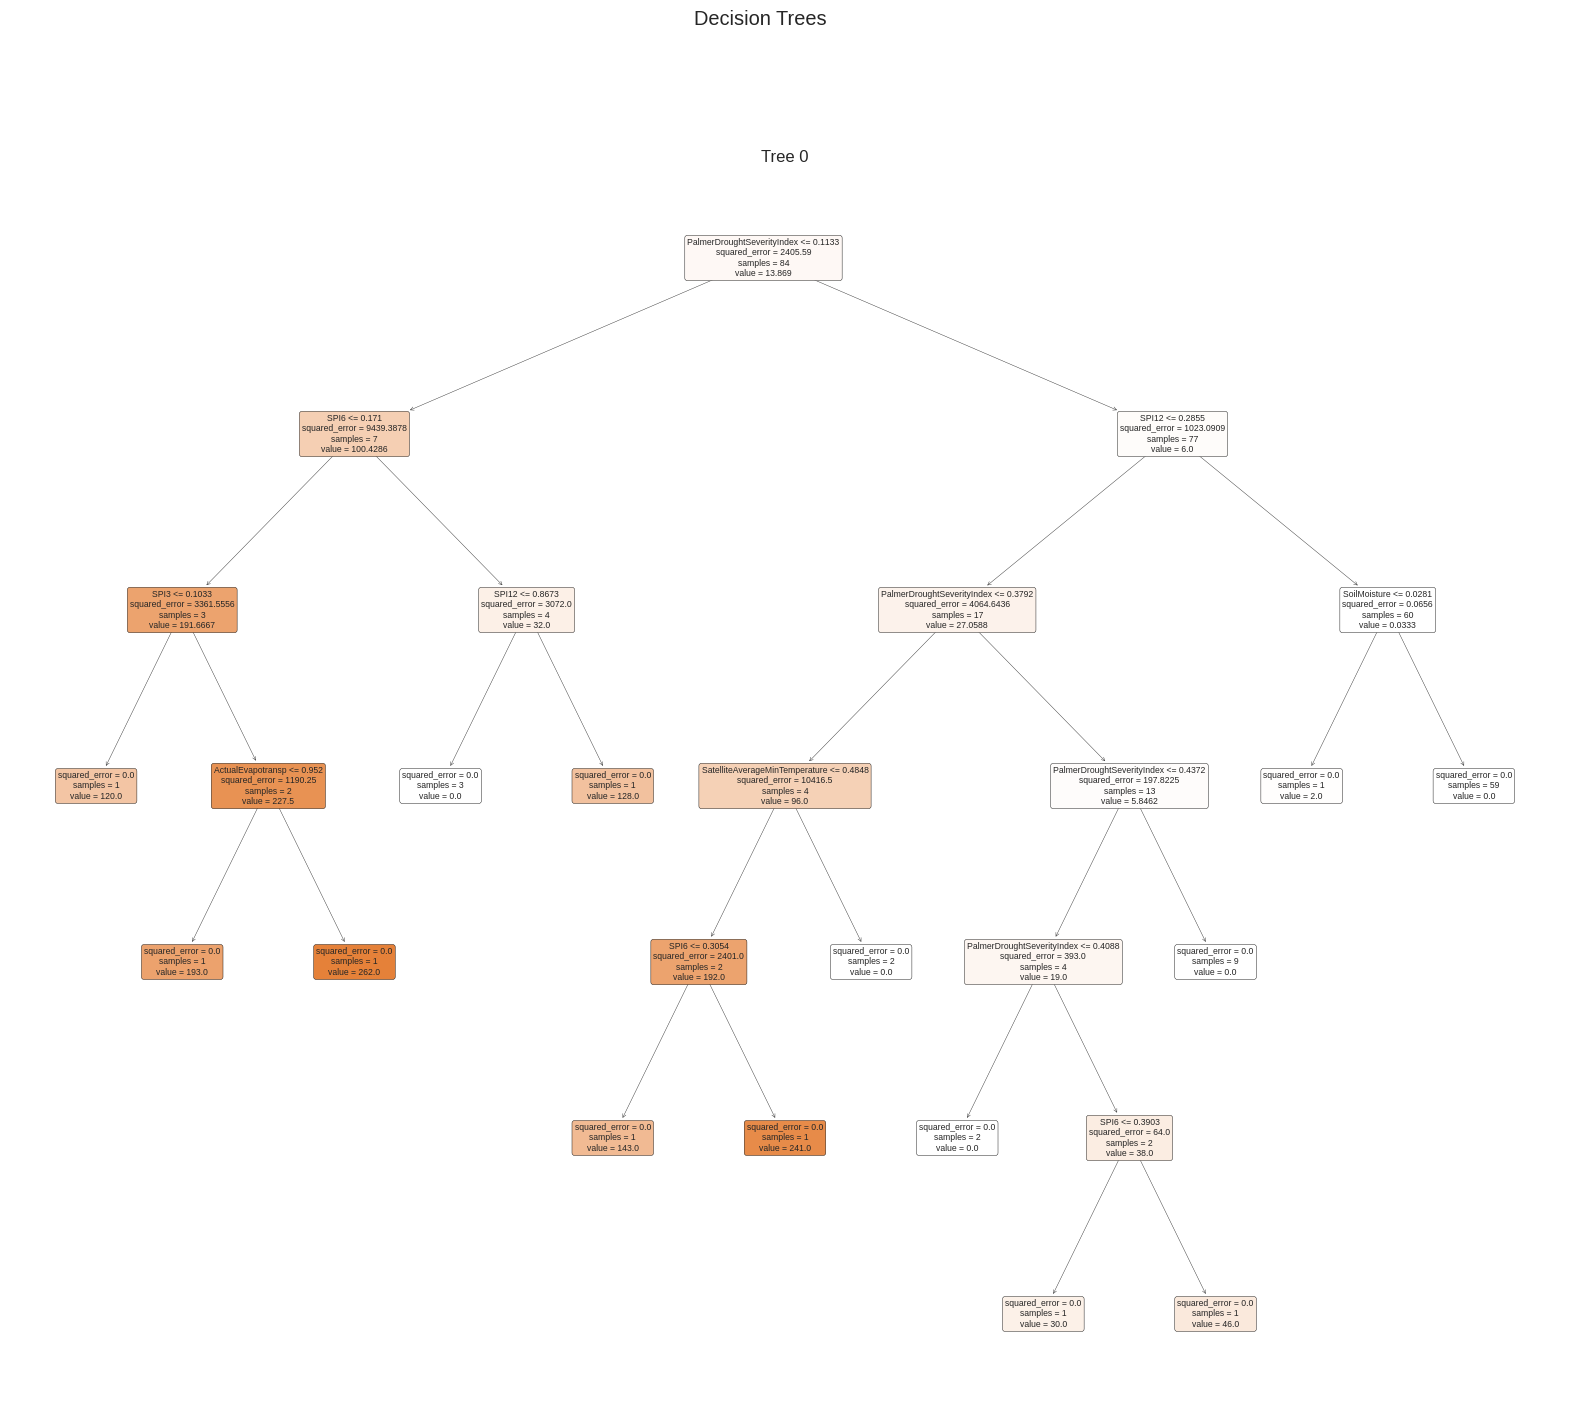

<Figure size 800x550 with 0 Axes>

In [92]:
# Visualize the decision tree using plot_tree
plt.figure(figsize=(12, 6))
plot_model(dt, 'tree')
plt.savefig('decision_tree_Malaria_high_res.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [97]:
# Assuming you have already trained your CatBoost model
# Visualize an individual decision tree from the ensemble
tree_idx = 5  # Index of the tree you want to visualize

model.plot_tree(1, pool=None)

NameError: name 'model' is not defined